In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.shape

(891, 12)

In [5]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

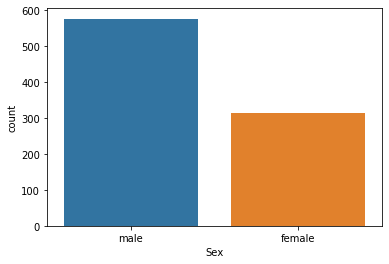

In [9]:
sns.countplot(data["Sex"])

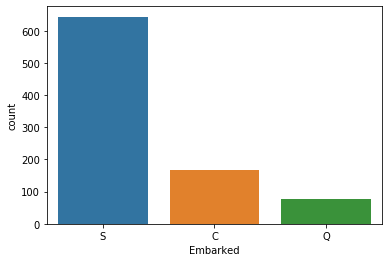

In [10]:
sns.countplot(data["Embarked"])

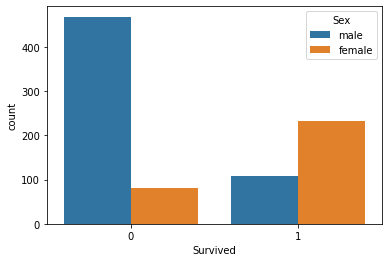

In [11]:
sns.countplot(data["Survived"],hue="Sex",data=data)

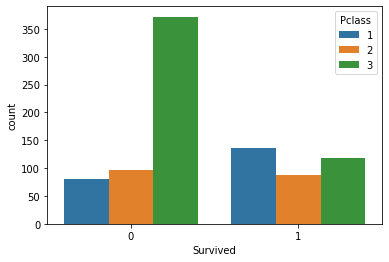

In [12]:
sns.countplot(data["Survived"], hue = data["Pclass"], data = data)

In [13]:
y=data["Survived"]

In [14]:
X= data[["Pclass","Sex","Age","SibSp","Parch","Embarked"]]

In [15]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S


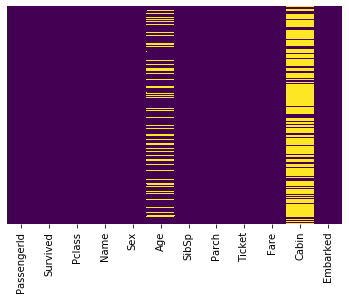

In [16]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap="viridis")

# Filling Nan values

In [17]:
data["Age"].mean()

29.69911764705882

In [18]:
data["Age"]=data["Age"].fillna(data["Age"].mean())

In [22]:
data["Age"][:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

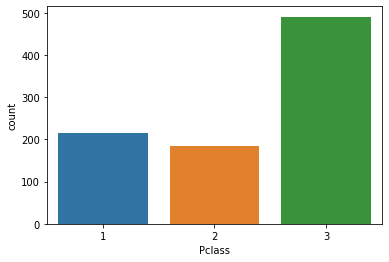

In [23]:
sns.countplot(x= 'Pclass', data= data)

In [24]:
data_corr = data.corr()["Pclass"][:-1]

In [25]:
data_corr

PassengerId   -0.035144
Survived      -0.338481
Pclass         1.000000
Age           -0.331339
SibSp          0.083081
Parch          0.018443
Name: Pclass, dtype: float64

In [100]:
#overall_mean=age.mean()
#mean_class_1 = data["Age"][data["Pclass"]==1].mean() #mean of age of people of Pclass==1
#mean_class_2 = data["Age"][data["Pclass"]==2].mean() #mean of age of people of Pclass==1
#mean_class_3 = data["Age"][data["Pclass"]==3].mean()  #mean of age of people of Pclass==1

In [101]:
# def impute_age(cols):            #replace Missing Age
#     age=cols[0]
#     Pclass=cols[1]
#     if pd.isnull(age):
#         if Pclass==1:
#             return int(mean_class_1)
#         elif Pclass==2:
#             return int(mean_class_2)
#         elif Pclass==3:
#             return int(mean_class_3)
#         else:
#             return int(overall_mean)
        
#     else:
#         return age
        

In [102]:
# data["Age"] = data[["Age","Pclass"]].apply(impute_age,axis=1)   

Observation:- When nan values were filled with the mean of the ages with respect to pclass the accuracy decreased. So, we will use the total mean 

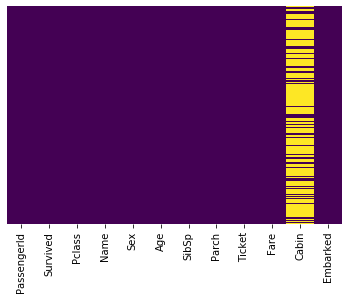

In [31]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap="viridis")

# Making Dummy variables

In [32]:
sex=data["Sex"]
pclass=data["Pclass"]
sibsp=data["SibSp"]
parch=data["Parch"]
embarked=data["Embarked"]
age= data["Age"]

In [33]:
sex=pd.get_dummies(sex, drop_first=True)
pclass=pd.get_dummies(pclass,drop_first=True)
sibsp=pd.get_dummies(sibsp,drop_first=True)
parch=pd.get_dummies(parch,drop_first=True)
embarked=pd.get_dummies(embarked,drop_first=True)

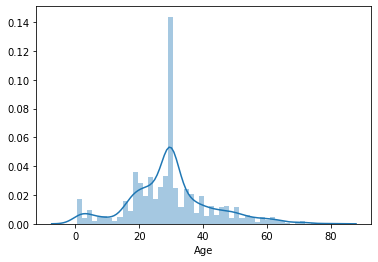

In [34]:
sns.distplot(age.dropna(),bins=50)

In [35]:
X = pd.concat([age,embarked,parch,sibsp,sex,pclass],axis=1)

In [36]:
X[:10]

,Age,Q,S,1,2,3,4,5,6,1,2,3,4,5,8,male,2,3
0,22.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,38.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,26.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,35.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,35.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5,29.699118,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
6,54.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,2.000000,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
8,27.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
9,14.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [37]:
data.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

# Splitting the data

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [40]:
X_train.shape

(596, 18)

# Logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model=LogisticRegression()

In [43]:
model.fit(X_train, y_train)

/home/shiv4ngi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred_log =model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test,y_pred_log)           #[157,  18][ 38,  82]

array([[157,  18],
       [ 38,  82]])

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       175
           1       0.82      0.68      0.75       120

    accuracy                           0.81       295
   macro avg       0.81      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295



In [52]:
#Import scikit-learn metrics module for accuracy calculation                   
from sklearn import metrics

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log))          #Accuracy: 0.8101694915254237

Accuracy: 0.8101694915254237


# Random Forest classifier

In [54]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators= 300)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_rf=clf.predict(X_test)

In [55]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))               #Accuracy: 0.8033898305084746

Accuracy: 0.7966101694915254


In [56]:
confusion_matrix(y_test,y_pred_rf)                     #[149,  26],[ 32,  88]

array([[149,  26],
       [ 34,  86]])

# Gaussian Naive Bayes

In [57]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()


In [58]:
#Train the model using the training sets
gnb.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:

#Predict the response for test dataset
y_pred_gb = gnb.predict(X_test)

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gb))

Accuracy: 0.4101694915254237
